# Data manipulation and analysis
A stronger interaction

##Pandas
**Pan**el **Da**ta **S**ystem 


- Python data analysis library 
- Built on top of Numpy 
- Open Sourced by AQR Capital Management, LLC in late 2009
- 30.000 lines of tested Python/Cython code 
- Used in production by many companies

In [2]:
# Climbing the pydata stack
import pandas as pd

Now we can do [**#kungfupandas**]()

<img src='http://j.mp/1Ixu8eH' width=400>


## Kung fu get

<img src='http://www.scicbeijing.com/Upfile/20091130015525774.jpg' width='400'>

### Read a file

Define files and the number of columns to be read

In [3]:
datafile = 'data/num.csv.gz'
infofile = 'data/num.csv.info'
cols_num = 3

Read columns from information file

In [4]:
cols_name = []
with open(infofile) as f:
    for row in f.read().splitlines():
        cols_name.append(row.split()[0])

print cols_name

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area', 'Soil_Type', 'Cover_Type']


Read the file with pandas!

In [5]:
# if you need help 
?pd.read_csv

In [6]:
A = pd.read_csv(datafile, \
    header=None, \
    names=cols_name[0:cols_num], \
    usecols=range(0, cols_num))

### Now you have a DataFrame

In [7]:
type(A)

pandas.core.frame.DataFrame

In [8]:
A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71436 entries, 0 to 71435
Data columns (total 3 columns):
Elevation    71436 non-null int64
Aspect       71436 non-null int64
Slope        71436 non-null int64
dtypes: int64(3)
memory usage: 2.2 MB


<small>Note: we get memory usage!</small>

In [9]:
# First five lines
A.head()

,Elevation,Aspect,Slope
0,2596,51,3
1,2590,56,2
2,2804,139,9
3,2785,155,18
4,2595,45,2


In [10]:
#Last five lines
A.tail()

,Elevation,Aspect,Slope
71431,2919,78,8
71432,2912,97,6
71433,2911,207,1
71434,2912,74,3
71435,2910,72,5


# DATA FRAMES

* A table-like data structure
* Commands for user to interact and modify the structure

* They can be compared with *R language* and **data.table** class
    - Basically a pythonic *data frame*
    - but with automatic data alignment!
    - Arithmetic operations align on row and column labels

## Kung fu columns
selecting and examining columns

<img src='http://j.mp/1dseP9b' width=400>

###Axis Indexing 

- Every axis has an index
- Highly optimized data structure
- Hierarchical indexing
- group by and join-type operations

<small>You will understand this by examples</small>

### Summarize all columns

In [11]:
A.describe()
# Only for numeric columns

,Elevation,Aspect,Slope
count,71436.000000,71436.000000,71436.000000
mean,2862.476678,138.018450,12.245129
std,256.034333,105.152815,6.925558
min,1863.000000,0.000000,0.000000
25%,2717.000000,53.000000,7.000000
50%,2903.000000,108.000000,11.000000
75%,3014.000000,206.000000,16.000000
max,3849.000000,360.000000,61.000000


In [12]:
# Select one column using the DataFrame attribute
A.Aspect[:4]

0     51
1     56
2    139
3    155
Name: Aspect, dtype: int64

In [13]:
# Select one column in a better way
index = 'Aspect'
A[index].head(4)

0     51
1     56
2    139
3    155
Name: Aspect, dtype: int64

In [14]:
# Wait... What type is a column?
type(A[index])

pandas.core.series.Series

# Series
> One-dimensional ndarray with axis labels; object similar to an array, list, or column in a table.

<img src='http://j.mp/1dseCmG' width=300>

A Series is a single vector of data (like a NumPy array) 

with an **index** that *labels* each element in the vector

In [15]:
# Make a Series
S = pd.Series([632, 1638, 569, 115])
S

0     632
1    1638
2     569
3     115
dtype: int64

If an index is not specified, a default sequence of integers is assigned as the index. 

A NumPy array comprises the values of the Series, while the index is a pandas Index object.

In [16]:
S.values

array([ 632, 1638,  569,  115])

In [17]:
S.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [18]:
# describe the Series (non-numeric)
A[index].describe()

count    71436.000000
mean       138.018450
std        105.152815
min          0.000000
25%         53.000000
50%        108.000000
75%        206.000000
max        360.000000
Name: Aspect, dtype: float64

### Name what you see

We can assign meaningful labels to the index, if they are available

In [19]:
bacteria = pd.Series([632, 1638, 569, 115], 
    index=['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'])

bacteria

Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

In [20]:
# Now it looks more like a dictionary
bacteria['Actinobacteria']

569

In [21]:
# In fact we can create it from a dict
bacteria_dict = {'Firmicutes': 632, 'Proteobacteria': 1638, \
    'Actinobacteria': 569, 'Bacteroidetes': 115}
pd.Series(bacteria_dict)

Actinobacteria     569
Bacteroidetes      115
Firmicutes         632
Proteobacteria    1638
dtype: int64

<small>Note: in this case the Series is created in key-sorted order</small>

In [22]:
# We can give both the array of values and the index 
# meaningful labels themselves

bacteria.name = 'counts'
bacteria.index.name = 'phylum'

bacteria

phylum
Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
Name: counts, dtype: int64

NumPy's math functions and other operations can be applied to Series without losing the data structure.

In [23]:
import numpy as np
np.log(bacteria)

phylum
Firmicutes        6.448889
Proteobacteria    7.401231
Actinobacteria    6.343880
Bacteroidetes     4.744932
Name: counts, dtype: float64

### The truth about Series
Booleans mask

In [24]:
for name in bacteria.index:
    print name.endswith('bacteria')

False
True
True
False


In [25]:
mask = [name.endswith('bacteria') for name in bacteria.index]
mask

[False, True, True, False]

In [26]:
bacteria[mask]

phylum
Proteobacteria    1638
Actinobacteria     569
Name: counts, dtype: int64

## Find what is missing

If we pass a custom index to Series

it will select the corresponding values from the dict

In [27]:
bacteria2 = pd.Series(bacteria_dict, \
        index=['Cyanobacteria','Firmicutes','Proteobacteria','Actinobacteria'])
bacteria2

Cyanobacteria      NaN
Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
dtype: float64

Indices without corresponding values are treat as **missing**

Pandas uses the NaN (not a number) type for missing values

In [28]:
# Find what is missing
bacteria2.isnull()

Cyanobacteria      True
Firmicutes        False
Proteobacteria    False
Actinobacteria    False
dtype: bool

The labels are used to **align** data when used in operations with other Series

In [29]:
bacteria + bacteria2

Actinobacteria    1138
Bacteroidetes      NaN
Cyanobacteria      NaN
Firmicutes        1264
Proteobacteria    3276
dtype: float64

- Contrast this with NumPy arrays
    * where arrays of the same length will combine values element-wise
- Adding Series combined values with the same label in the resulting series
    * Notice also that *the missing values were propogated* by addition

## Back to *columns*
selecting and examining columns inside a dataframe

In [30]:
# Limit table output size
pd.set_option('max_rows', 5)

In [31]:
A

,Elevation,Aspect,Slope
0,2596,51,3
1,2590,56,2
...,...,...,...
71434,2912,74,3
71435,2910,72,5


In [32]:
type(A)

pandas.core.frame.DataFrame

In [33]:
index

'Aspect'

In [34]:
type(A[index])

pandas.core.series.Series

In [35]:
# For each value, count number of occurrences
A[index].value_counts()

45     1366
90      931
       ... 
226      19
360       5
dtype: int64

## Exercise

* Produce the table with the top three most used values for the column 'Elevation'
* Find the name of the column having the most high 75% value of the whole dataset

In [36]:
# Top three
A['Elevation'].value_counts().head(3)

2968    578
2972    573
2975    546
dtype: int64

In [37]:
# The column with most high 75%
X = A.quantile(q=0.75)
print X[X == X.max()]

Elevation    3014
dtype: float64


## Kungfu approach 1
Focus on one opponent at the time

<img src='http://i.ytimg.com/vi/9DW-ZDT2CwY/maxresdefault.jpg' width=500>

For each unique value in column `index`

calculate mean of *ALL* other <u>numeric</u> columns

In [38]:
A.groupby(index).mean()

,Elevation,Slope
Aspect,,
0,2931.376430,8.051487
1,2764.614815,15.296296
...,...,...
359,2781.500000,16.180851
360,2460.800000,29.800000


<img src='http://themamareport.com/wp-content/uploads/2013/06/kung-fu-image-still.jpg' width='450'>
<small> You may have noticed: *chainability*</small>

In [39]:
A.groupby(index).Elevation.mean()

Aspect
0      2931.376430
1      2764.614815
          ...     
359    2781.500000
360    2460.800000
Name: Elevation, dtype: float64

## Kungfu approach 2
Transform the strength of one opponent in your strength

<img src='http://www.shaolin.org/images/taijiquan/com_22c.jpg' width=400>

Add a new column as a function of existing columns

In [40]:
A['new_col1'] = A.Elevation * 10
A['new_col2'] = A['Slope'] + A['Aspect'] - 1
# Check it
A

,Elevation,Aspect,Slope,new_col1,new_col2
0,2596,51,3,25960,53
1,2590,56,2,25900,57
...,...,...,...,...,...
71434,2912,74,3,29120,76
71435,2910,72,5,29100,76


<small>note: can't (usually) **assign** to an attribute 

(e.g., `A.new_col`)</small>

In [41]:
# rename a column
A.rename(columns={'new_col2':'a_sum'}, inplace=True)
A

,Elevation,Aspect,Slope,new_col1,a_sum
0,2596,51,3,25960,53
1,2590,56,2,25900,57
...,...,...,...,...,...
71434,2912,74,3,29120,76
71435,2910,72,5,29100,76


## Kung fu approach 3
Make your opponent see what you want him to see

<img src='http://funnystatus.socialzoidllc.netdna-cdn.com/wp-content/uploads/2013/06/hiding-panda.png' width=400>

In [42]:
# Hide a column (temporarily)
A.drop(['new_col1'], axis=1)

,Elevation,Aspect,Slope,a_sum
0,2596,51,3,53
1,2590,56,2,57
...,...,...,...,...
71434,2912,74,3,76
71435,2910,72,5,76


<small>hint: use 'axis=0' to drop rows instead</small>

Alternative way: **slice** 'columns' attribute like a <u>list</u>!

In [43]:
A[A.columns[:-2]]

,Elevation,Aspect,Slope
0,2596,51,3
1,2590,56,2
...,...,...,...
71434,2912,74,3
71435,2910,72,5


A more violent approach: delete a column **permanently**

In [44]:
# E.g. if you need memory
del A['new_col1']

## Kung fu knows opponent charateristics
before touching him

```
A.columns              # column names (which is "an index")
A.dtypes               # data types of each column
A.shape                # number of rows and columns
A.values               # underlying numpy array
```

... and many more: just write A. [and press TAB]

# Filtering

<img src='https://tcrf.net/images/8/81/Dd3NES_player_select.png'>

In [45]:
# Filter rows based on column values
A[A[index] < 20]

,Elevation,Aspect,Slope,a_sum
18,2504,0,4,3
58,2489,11,4,14
...,...,...,...,...
71329,2972,6,14,19
71333,2952,17,12,28


Advanced logical filtering

In [46]:
# use multiple conditions
condition = (A.Elevation < 2400) & (A.Slope == 17)
cols = ['Slope', 'Aspect']
A[condition][cols]

,Slope,Aspect
1820,17,344
1825,17,50
...,...,...
13555,17,287
15007,17,107


<small>Note: `AND` and `OR` do not work inside data frame conditions</small>

In [47]:
# Filter specific values
B = A[A[index].isin([13,17])]
B

,Elevation,Aspect,Slope,a_sum
67,2919,13,13,25
91,2788,13,16,28
...,...,...,...,...
71312,3047,13,13,25
71333,2952,17,12,28


In [48]:
len(B)

602

## Kung fu reverse
Filtering on rows instead of columns

<img src='https://s-media-cache-ak0.pinimg.com/236x/59/d3/ce/59d3ce8e901e366b7c89f137c6967c7f.jpg'>

```
# Wait, how do i get the third row
A[2]
```

this does not work as expected

In [49]:
# Get single row
A.loc[2]

Elevation    2804
Aspect        139
Slope           9
a_sum         147
Name: 2, dtype: int64

In [50]:
# Slice of rows
A.loc[0:2]

,Elevation,Aspect,Slope,a_sum
0,2596,51,3,53
1,2590,56,2,57
2,2804,139,9,147


In [51]:
# Slice of columns too ;)
A.loc[2:4, 'Elevation':'Slope']

,Elevation,Aspect,Slope
2,2804,139,9
3,2785,155,18
4,2595,45,2


`:` is a range, `,` is a list

In [52]:
A.loc[[2,4], ['Elevation','Slope']]

,Elevation,Slope
2,2804,9
4,2595,2


In [53]:
# iloc only use integer as position
A.iloc[[2,4],[0,2]]

,Elevation,Slope
2,2804,9
4,2595,2


But...

In [54]:
# Get single row
A.ix[2]

Elevation    2804
Aspect        139
Slope           9
a_sum         147
Name: 2, dtype: int64

> `.ix` supports mixed integer and label based access

source: http://pandas.pydata.org/pandas-docs/stable/indexing.html#different-choices-for-indexing

# Kung conFusion

We want to understand better

In [55]:
import re
pattern = re.compile('\.\_([A-Za-z]+)')

# Create a function to write the object and its first line from his docstring
def docline(obj):
    strname = pattern.findall(str(type(obj)))[0]
    firstline = obj.__doc__.split('\n')[0]
    print strname + ":\t" + firstline

In [56]:
# Comparing by the docs

docline(A.loc)
docline(A.iloc)
docline(A.ix)
docline(A.at)
docline(A.iat)

LocIndexer:	Purely label-location based indexer for selection by label.
iLocIndexer:	Purely integer-location based indexing for selection by position.
IXIndexer:	A primarily label-location based indexer, with integer position
AtIndexer:	Fast label-based scalar accessor
iAtIndexer:	Fast integer location scalar accessor.


In [57]:
# What do they really do?
pos = 2
for indexer in [A.loc, A.iloc, A.ix, A[index].at, A[index].iat]:
    print indexer[pos]
    print ""

Elevation    2804
Aspect        139
Slope           9
a_sum         147
Name: 2, dtype: int64

Elevation    2804
Aspect        139
Slope           9
a_sum         147
Name: 2, dtype: int64

Elevation    2804
Aspect        139
Slope           9
a_sum         147
Name: 2, dtype: int64

139

139



Index:
- loc: only works on index
- iloc: works on position
- ix: you can get data from dataframe without this to be in the index

Scalar:
- at: get scalar values; a very fast loc
- iat: Get scalar values; a very fast iloc

# Kung fu order

<img src='http://product_images_y.s3.amazonaws.com/un-sp-15/product/full/un-sp-15.jpg' width=500>

Sort things out

In [58]:
# Sort rows by label
A.sort_index()

,Elevation,Aspect,Slope,a_sum
0,2596,51,3,53
1,2590,56,2,57
...,...,...,...,...
71434,2912,74,3,76
71435,2910,72,5,76


In [59]:
# Sort rows by a specific column
A.sort_index(by=index)

,Elevation,Aspect,Slope,a_sum
65052,2982,0,9,8
35524,3031,0,13,12
...,...,...,...,...
2343,2062,360,30,389
12204,2046,360,29,388


In [60]:
# Only works for a Series
A[index].order()

65052      0
35524      0
        ... 
2343     360
12204    360
Name: Aspect, dtype: int64

In [61]:
# Use descending order instead
A.sort_index(by=index, ascending=False)

,Elevation,Aspect,Slope,a_sum
15816,2673,360,35,394
12204,2046,360,29,388
...,...,...,...,...
32479,2919,0,9,8
46484,3041,0,9,8


In [62]:
# Sort by multiple columns
A.sort_index(by=['Slope', 'Elevation'])

,Elevation,Aspect,Slope,a_sum
16889,2494,180,0,179
17727,2554,45,0,44
...,...,...,...,...
16251,2736,178,61,238
16252,2736,174,61,234


## Exercise

In [63]:
# Our small data set
d = {'one':[1,1,1,1,1],
     'two':[2,2,2,2,2],
     'letter':['a','a','b','b','c']}

* Create a pandas structure from the dataset below
* Find the letter(s) with maximum number of ones and twos

In [64]:
import pandas as pd
df = pd.DataFrame(d)
dg = df.groupby('letter').sum()
print dg
dg[dg == dg.max()].dropna()

        one  two
letter          
a         2    4
b         2    4
c         1    2


,one,two
letter,,
a,2,4
b,2,4


# So far

- Check data before getting started
- Choose columns by label or index
- Filter rows on index and values
- Group by
- Sort

<small>note: just like *databases*</small>

<small>hint: we can do better</small>

# Unique is what we are
Find what is duplicated

In [65]:
# Series of booleans (True if a row is identical to a previous row)
A.duplicated()

0        False
1        False
         ...  
71434    False
71435    False
dtype: bool

In [66]:
# Count duplicates
A.duplicated().sum()

3229

In [67]:
# Find the duplicate with minimum elevation value
A[A.duplicated()].sort_index(by='Elevation').head(1)

,Elevation,Aspect,Slope,a_sum
3426,2331,185,15,199


In [68]:
# Check if it really is a duplicate
A[(A.Elevation==2331) & (A.Aspect==185)]

,Elevation,Aspect,Slope,a_sum
3328,2331,185,15,199
3426,2331,185,15,199


**Fighting the dark forces**

In [69]:
pd.set_option('max_rows', 0)
# Drop duplicate rows
A.drop_duplicates().describe()

,Elevation,Aspect,Slope,a_sum
count,68207.00000,68207.000000,68207.000000,68207.000000
mean,2857.45271,138.797220,12.415119,150.212339
std,259.48115,105.456545,6.975805,106.048039
min,1863.00000,0.000000,0.000000,-1.000000
25%,2711.00000,54.000000,7.000000,65.000000
50%,2893.00000,108.000000,11.000000,120.000000
75%,3014.00000,207.000000,16.000000,218.000000
max,3849.00000,360.000000,61.000000,397.000000


# The index

In [70]:
# Use a different example dataset
baseball = pd.read_csv("https://raw.githubusercontent.com/fonnesbeck/statistical-analysis-python-tutorial/master/data/baseball.csv", index_col='id')

In [71]:
pd.set_option('max_columns', 10)
baseball.head()

,player,year,stint,team,lg,...,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,...,0,0,3,0,0
88643,schilcu01,2006,1,BOS,AL,...,0,0,0,0,0
88645,myersmi01,2006,1,NYA,AL,...,0,0,0,0,0
88649,helliri01,2006,1,MIL,NL,...,0,0,0,0,0
88650,johnsra05,2006,1,NYA,AL,...,0,0,0,0,0


##Reindexing

Reindexing allows users to manipulate the data labels in a DataFrame

In [72]:
# Alter the order of the rows
baseball.reindex(baseball.index[::-1]).head()

,player,year,stint,team,lg,...,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,
89534,alomasa02,2007,1,NYN,NL,...,0,0,0,0,0
89533,aloumo01,2007,1,NYN,NL,...,5,2,0,3,13
89530,ausmubr01,2007,1,HOU,NL,...,3,6,4,1,11
89526,benitar01,2007,1,SFN,NL,...,0,0,0,0,0
89525,benitar01,2007,2,FLO,NL,...,0,0,0,0,0


In [73]:
# Let's try all the possible keys
cols = ['player','year','team']
id_range = range(baseball.index.values.min(), baseball.index.values.max())
baseball[cols].reindex(id_range).head()

,player,year,team
id,,,
88641,womacto01,2006,CHN
88642,NaN,NaN,NaN
88643,schilcu01,2006,BOS
88644,NaN,NaN,NaN
88645,myersmi01,2006,NYA


In [74]:
# Fill the blanks
baseball.reindex(id_range, fill_value='MR Unknown', columns=['player']).head()

,player
id,
88641,womacto01
88642,MR Unknown
88643,schilcu01
88644,MR Unknown
88645,myersmi01


In [75]:
# In different methods
baseball[cols].reindex(id_range, method='ffill', columns=['player','year']).head()

,player,year
id,,
88641,womacto01,2006
88642,womacto01,2006
88643,schilcu01,2006
88644,schilcu01,2006
88645,myersmi01,2006


##Mutiple index

If you are feeling forced to combine fields 
- to obtain a unique index 
    * that was not simply an integer value
    
A more elegant way is to create a **hierarchical index** from fields

In [76]:
baseball_h = baseball.set_index(['year', 'team', 'player'])
baseball_h.head(10)

stint  lg    g   ab   r  ...   ibb  hbp  sh  sf  gidp
year team player                              ...                         
2006 CHN  womacto01      2  NL   19   50   6  ...     0    0   3   0     0
     BOS  schilcu01      1  AL   31    2   0  ...     0    0   0   0     0
     NYA  myersmi01      1  AL   62    0   0  ...     0    0   0   0     0
     MIL  helliri01      1  NL   20    3   0  ...     0    0   0   0     0
     NYA  johnsra05      1  AL   33    6   0  ...     0    0   0   0     0
     SFN  finlest01      1  NL  139  426  66  ...     2    2   3   4     6
     ARI  gonzalu01      1  NL  153  586  93  ...    10    7   0   6    14
     LAN  seleaa01       1  NL   28   26   2  ...     0    0   6   0     1
2007 ATL  francju01      2  NL   15   40   1  ...     1    0   0   1     1
     NYN  francju01      1  NL   40   50   7  ...     0    0   0   1     1

[10 rows x 19 columns]

In [77]:
baseball_h.index.is_unique

True

In [78]:
# This player has signed for two different teams in the same year
baseball_h['stint'].ix[(2007, 'ATL', 'francju01')]

2

# Kung fu Combos
the index magic
<img src='http://4.bp.blogspot.com/-JlsSOjjrng8/T0rOEr3K4mI/AAAAAAAAAUM/GH3f1iQzp-o/s1600/kungfuicon.png' width=400>

In [79]:
df1 = pd.DataFrame({'A': ['A0', 'A1'], 'B': ['B0', 'B1']}, index=[0, 1])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'], 'B': ['B4', 'B5', 'B6', 'B7']},index=[4, 5, 6, 7])
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10'],'B': ['B8', 'B9', 'B10']}, index=[8, 9, 10])

In [80]:
pd.set_option('max_rows', 10)

# Combine the elements
pd.concat([df1,df2,df3])

,A,B
0,A0,B0
1,A1,B1
4,A4,B4
5,A5,B5
6,A6,B6
7,A7,B7
8,A8,B8
9,A9,B9
10,A10,B10


In [81]:
# Alternative combo
df1.append(df3)

,A,B
0,A0,B0
1,A1,B1
8,A8,B8
9,A9,B9
10,A10,B10


## Joining

pandas has full-featured, high performance in-memory join operations idiomatically very similar to relational databases like SQL. 

`pd.merge`

In [82]:
df1 = pd.DataFrame({'A': ['A0', 'A1'], 'key': ['k1','k2'], 'B': ['B0', 'B1']}, index=[0, 1])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'], 'key': ['k2','k1','k4','k3'], 'B': ['B4', 'B0', 'B6', 'B7']},index=[4, 5, 6, 7])

In [83]:
df1

,A,B,key
0,A0,B0,k1
1,A1,B1,k2


In [84]:
df2

,A,B,key
4,A4,B4,k2
5,A5,B0,k1
6,A6,B6,k4
7,A7,B7,k3


In [85]:
pd.merge(df1,df2, on='key')

,A_x,B_x,key,A_y,B_y
0,A0,B0,k1,A5,B0
1,A1,B1,k2,A4,B4


In [86]:
# Join on multiple keys!
pd.merge(df1,df2, on=['key','B'])

,A_x,B,key,A_y
0,A0,B0,k1,A5


<img src='images/sqljoins.png' width=800>

source: http://pandas.pydata.org/pandas-docs/stable/merging.html

# I/O

## Snapshot
Quicly write the current status of a DataFrame to a CSV

In [87]:
csvfile = 'my_file.csv'

In [88]:
A.to_csv(csvfile)
# Warning: index is used as first column
!head {csvfile}

,Elevation,Aspect,Slope,a_sum
0,2596,51,3,53
1,2590,56,2,57
2,2804,139,9,147
3,2785,155,18,172
4,2595,45,2,46
5,2579,132,6,137
6,2606,45,7,51
7,2605,49,4,52
8,2617,45,9,53


In [89]:
# Better to ignore the index column!
A.to_csv(csvfile, index=False)
!head {csvfile}

Elevation,Aspect,Slope,a_sum
2596,51,3,53
2590,56,2,57
2804,139,9,147
2785,155,18,172
2595,45,2,46
2579,132,6,137
2606,45,7,51
2605,49,4,52
2617,45,9,53


## Reading from a remote source

In [90]:
# read CSV file directly from a URL and save the results
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


## Reading from Excel

> Since so much financial and scientific data ends up in Excel spreadsheets (*regrettably*), Pandas' ability to directly import Excel spreadsheets is **valuable**. 

<small>Warning: This support is contingent on having dependencies installed: `xlrd` and `openpyxl`</small>

<small>Note: Don't forget to use standards and open formats</small>

Our file

In [91]:
xlsfile = 'data/output.xlsx'

Write from a Dataframe

In [92]:
writer = pd.ExcelWriter(xlsfile)
A[:2500].to_excel(writer,'Sheet1')
writer.save()

Read the xls file

In [93]:
B = pd.read_excel(xlsfile, sheetname='Sheet1')
B.head()

,Elevation,Aspect,Slope,a_sum
0,2596,51,3,53
1,2590,56,2,57
2,2804,139,9,147
3,2785,155,18,172
4,2595,45,2,46


## From dataframe to JSON

In [94]:
jsonfile = 'data/mydata.json'

# Save the first 5 rows
B.loc[:5].to_json(jsonfile)

# Show what we get
!more {jsonfile}

{"Elevation":{"0":2596,"1":2590,"2":2804,"3":2785,"4":2595,"5":2579},"Aspect":{"
0":51,"1":56,"2":139,"3":155,"4":45,"5":132},"Slope":{"0":3,"1":2,"2":9,"3":18,"
4":2,"5":6},"a_sum":{"0":53,"1":57,"2":147,"3":172,"4":46,"5":137}}


<small>hint: reverse is `pd.read_json`</small>

#Kung fu alchemy

Pandas integrates well with `sqlalchemy`


<small>hint: the most famous `ORM`; you should use it, if you work with dbs.</small>

List of url relational database engines for `sqlalchemy`

- sqlite
- postgres
- mysql
- oracle
- microsoft 

> **Write records stored in a DataFrame to a SQL database.**
>
> *Parameters*

>name : string
>    Name of SQL table

>con : SQLAlchemy engine or DBAPI2 connection (legacy mode)

>    Using SQLAlchemy makes it possible to use any DB supported by that
>    library.
>    If a DBAPI2 object, only sqlite3 is supported.

source: `pd.DataFrame.to_sql?`

```
# read db table in 3 lines
from sqlalchemy import create_engine
con = create_engine('postgresql://user@hostname:port/database')
df = pd.read_sql_table('mytable', con)
```

## Kung fu is full power

Dare to receive any data

In [95]:
data = pd.DataFrame({0: {'patient': 1, 'phylum': 'Firmicutes', 'value': 632},
                    1: {'patient': 1, 'phylum': 'Proteobacteria', 'value': 1638},
                    2: {'patient': 1, 'phylum': 'Actinobacteria', 'value': 569},
                    3: {'patient': 1, 'phylum': 'Bacteroidetes', 'value': 115},
                    4: {'patient': 2, 'phylum': 'Firmicutes', 'value': 433},
                    5: {'patient': 2, 'phylum': 'Proteobacteria', 'value': 1130},
                    6: {'patient': 2, 'phylum': 'Actinobacteria', 'value': 754},
                    7: {'patient': 2, 'phylum': 'Bacteroidetes', 'value': 555}})

In [96]:
data

,0,1,2,3,4,5,6,7
patient,1,1,1,1,2,2,2,2
phylum,Firmicutes,Proteobacteria,Actinobacteria,Bacteroidetes,Firmicutes,Proteobacteria,Actinobacteria,Bacteroidetes
value,632,1638,569,115,433,1130,754,555


In [97]:
data = data.T
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,1130
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


# Full power is being cautious

In [98]:
# Take a Subseries and modify
vals = data.value
vals[5] = 0
vals

0     632
1    1638
2     569
3     115
4     433
5       0
6     754
7     555
Name: value, dtype: object

*Oooops*

In [99]:
data.loc[5]

patient                 2
phylum     Proteobacteria
value                   0
Name: 5, dtype: object

<small>hint: just like numpy</small>

In [100]:
# Deep copy
vals = data.value.copy()
vals[5] = 1000
data.loc[5]

patient                 2
phylum     Proteobacteria
value                   0
Name: 5, dtype: object

# Plots

In [101]:
%matplotlib inline

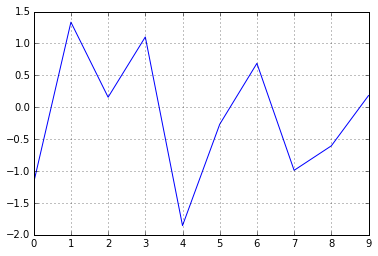

In [102]:
# Numpy random samples from a normal Gaussian distribution
normals = pd.Series(np.random.normal(size=10))
normals.plot()

# Level up

<img src='http://www.gamefabrique.com/storage/screenshots/nes/super-mario-bros-3-04.png'>

In [103]:
# Built on top of matplotlib
import seaborn as sns

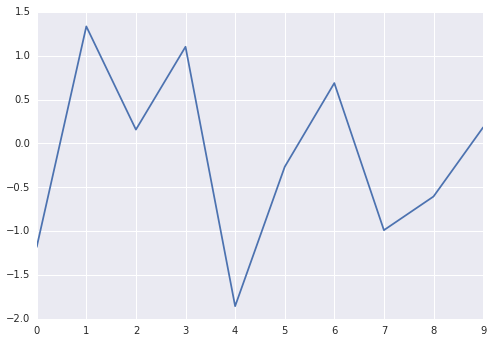

In [104]:
normals.plot()

In [105]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})

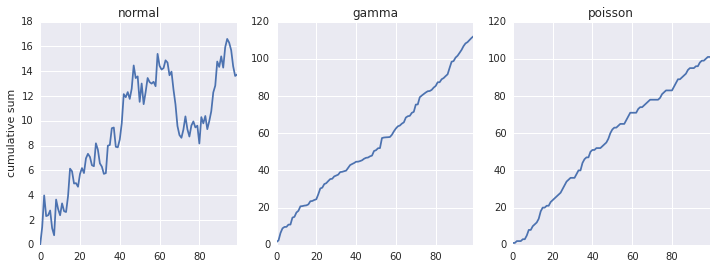

In [106]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum')

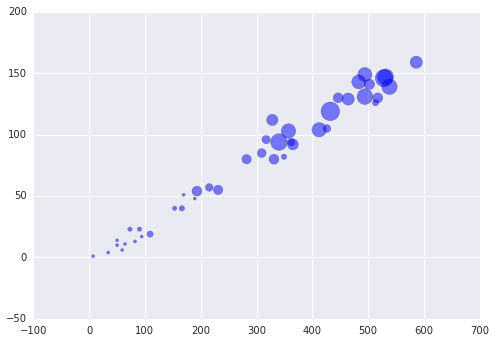

In [107]:
# From the previous dataset
plt.scatter(baseball.ab, baseball.h, s=baseball.hr*10, alpha=0.5)

Seaborn as a nice list of dataset included

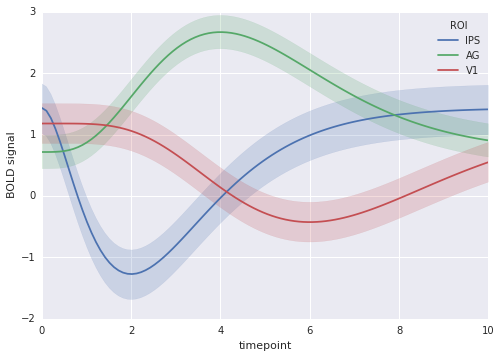

In [108]:
gammas = sns.load_dataset("gammas")
sns.tsplot(gammas, "timepoint", "subject", "ROI", "BOLD signal")

source: http://stanford.edu/~mwaskom/software/seaborn/examples/network_correlations.html

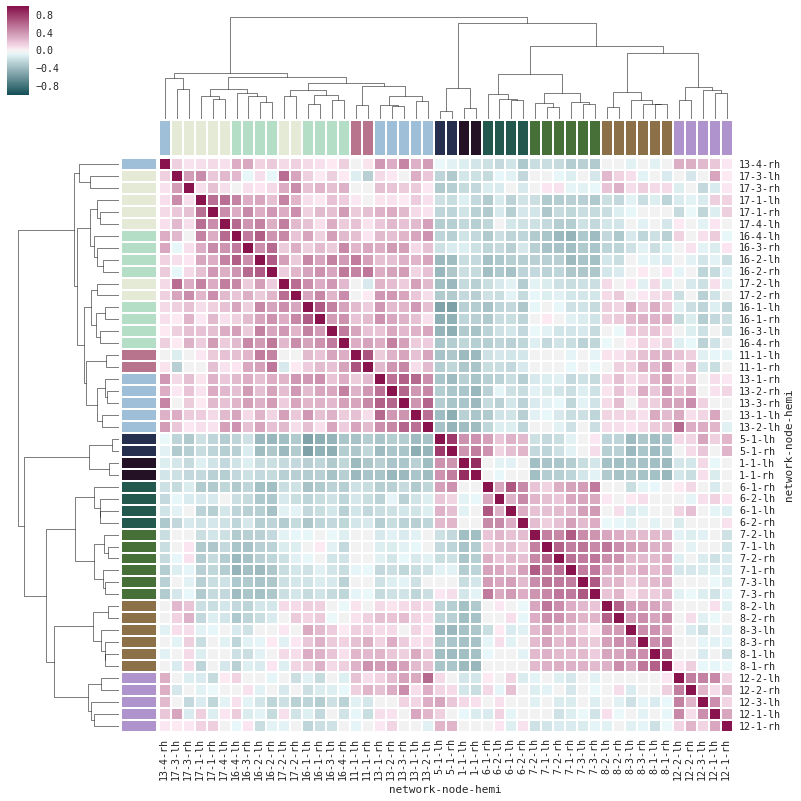

In [109]:
# Full Seaborn Power
sns.set(font="monospace")

# DATAFRAME
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
used_networks = [1, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]
#NETWORKS
network_pal = sns.cubehelix_palette(len(used_networks),
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)
network_lut = dict(zip(map(str, used_networks), network_pal))
networks = df.columns.get_level_values("network")
#COLORS
network_colors = pd.Series(networks).map(network_lut)
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
# HEATMAP
sns.clustermap(df.corr(), row_colors=network_colors, method="average",
               col_colors=network_colors, figsize=(13, 13), cmap=cmap)

## Travel in time
`- timeseries -`

Pandas has a built in support for time series

<small>hint: time objects are the most difficult to make compatibles</small>

In [110]:
# Monthly range between a time period
dates = pd.date_range('2010-01', '2015-06', freq='M')
# Pandas makes this easy!
dates

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31', '2010-11-30', '2010-12-31',
               '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
      

In [111]:
# Create a subset of our original dataframe
B = A.head(len(dates)).copy()
# Since the size is the same, we can add months as a new column
B['time'] = dates
B

,Elevation,Aspect,Slope,a_sum,time
0,2596,51,3,53,2010-01-31
1,2590,56,2,57,2010-02-28
2,2804,139,9,147,2010-03-31
3,2785,155,18,172,2010-04-30
4,2595,45,2,46,2010-05-31
...,...,...,...,...,...
60,2490,75,5,79,2015-01-31
61,2952,107,11,117,2015-02-28
62,2705,90,8,97,2015-03-31
63,2507,40,7,46,2015-04-30


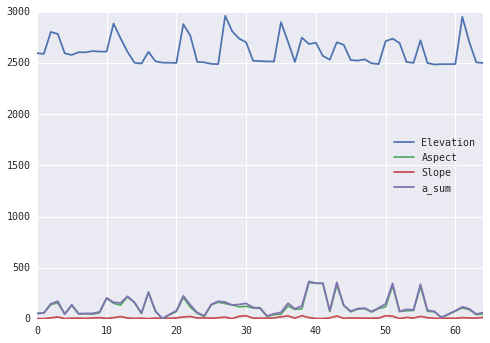

In [112]:
B.plot()

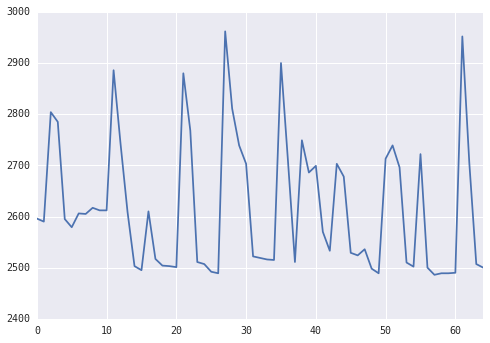

In [113]:
B.Elevation.plot()

In [114]:
# Let's work now on a single Series
C = pd.Series(B.Aspect, copy=True)
C.index = dates
C

2010-01-31     51
2010-02-28     56
2010-03-31    139
2010-04-30    155
2010-05-31     45
             ... 
2015-01-31     75
2015-02-28    107
2015-03-31     90
2015-04-30     40
2015-05-31     49
Freq: M, Name: Aspect, dtype: int64

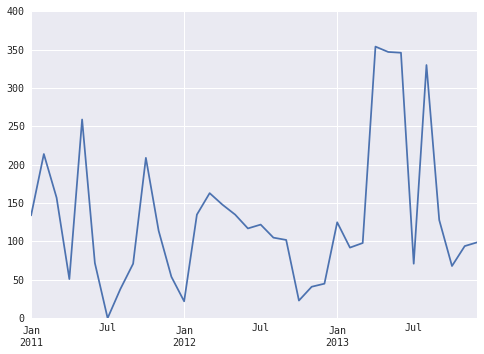

In [115]:
# Select a time subset
C['2011':'2013'].plot()

In [116]:
D = pd.Series(B.Slope, copy=True)
D.index = dates

In [117]:
T = pd.DataFrame({'s1':C, 's2':D})

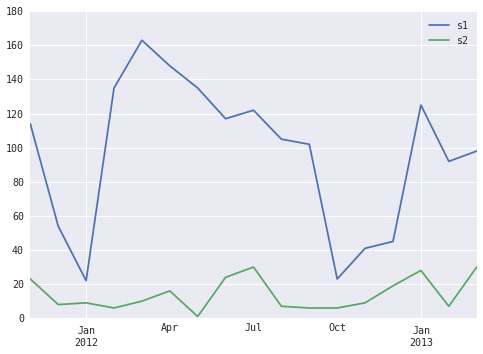

In [118]:
# Select a time subset
T['2011-11':'2013-03'].plot()

**The pandas time-series API includes**:

- Creating date ranges
    - From files
    - From scratch
- Manipulations
    - Shift, resample, filter
- Field accessors 
    - (e.g., hour of day)
- Plotting
- Time zones 
    -localization and conversion

## Kungfu requires continuous training
...and meditation

<img src='http://j.mp/1KWt1pb' width=600>

- Pandas is a very powerful and sometimes complex framework
    - The [cookbook](http://pandas.pydata.org/pandas-docs/stable/pandas.pdf) is > 1600 pages!
- Many operations
    - Some operations can be optained in different but equivalent ways

> Be still, like water

# Comparison

Pandas is trying to cover the gap between python and R

http://pandas.pydata.org/pandas-docs/stable/comparison_with_r.html

In [119]:
# Versions
%load_ext version_information
%version_information numpy, scipy, pandas, matplotlib, seaborn, bokeh

Software versions
Python 2.7.10 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 3.1.0
OS Linux 4.0.3 boot2docker x86_64 with debian jessie sid
numpy 1.9.2
scipy 0.15.1
pandas 0.16.1
matplotlib 1.4.3
seaborn 0.5.1
bokeh 0.9.0
Mon Jun 15 14:42:15 2015 UTC

> This is not the end

<img src='http://sd.keepcalm-o-matic.co.uk/i/keep-calm-and-happy-coding.png' width=400>